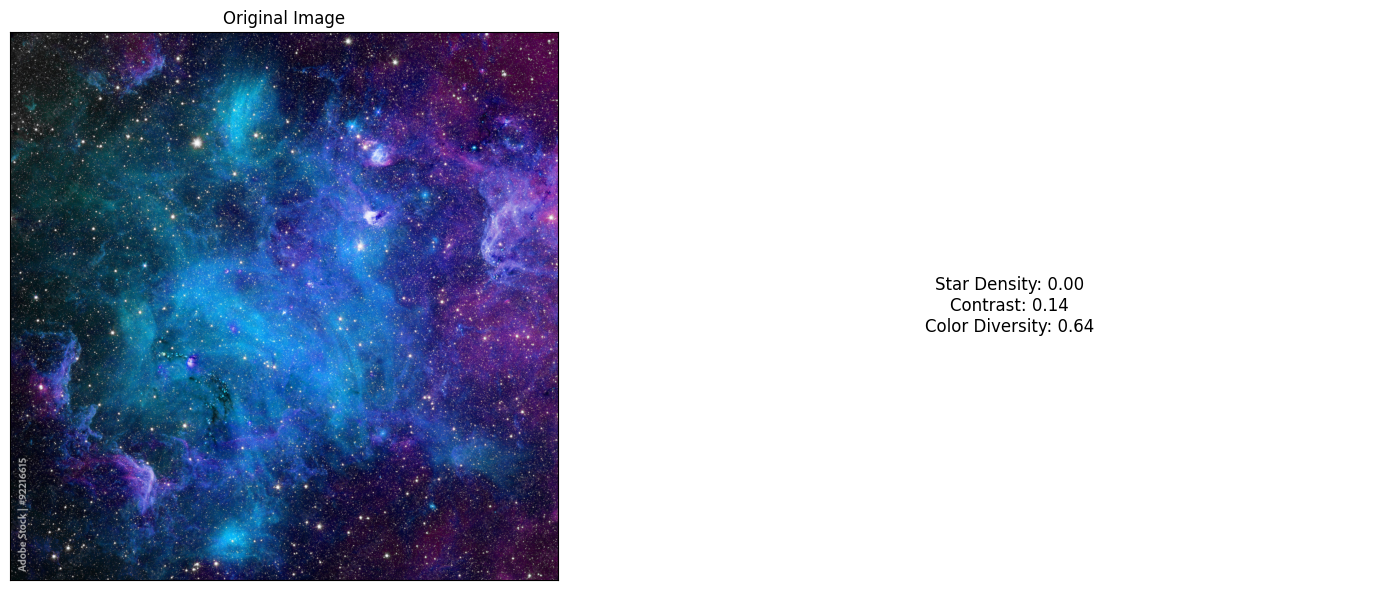

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

def rms_contrast(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return np.std(gray) / 255.0

def color_diversity_entropy(image):
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = hist / hist.sum()
    return -1 * (hist * np.log2(hist + np.finfo(float).eps)).sum() / np.log2(hist.size)

def star_density(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    ret, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return len(contours) / (image.shape[0] * image.shape[1])

# Load image from URL
image_url = "https://as1.ftcdn.net/v2/jpg/00/92/21/66/1000_F_92216615_bLySNjZrHZGBvf01vwTEBr5kYn9b2T3T.jpg"
response = requests.get(image_url)
img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
img = cv2.imdecode(img_array, -1)

# Calculate features
contrast = rms_contrast(img)
diversity = color_diversity_entropy(img)
density = star_density(img)

# Display results and the star mask
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2)
plt.axis('off')
plt.text(0.5, 0.5, f'Star Density: {density:.2f}\n'
                   f'Contrast: {contrast:.2f}\n'
                   f'Color Diversity: {diversity:.2f}',
         fontsize=12, ha='center', va='center')
plt.tight_layout()
plt.show()
